In [ ]:
pip install ucimlrepo

In [ ]:
# Import the warnings module
import warnings

# Disable all warnings to keep the notebook output clean
# Be cautious: ignoring warnings might hide significant information
warnings.filterwarnings('ignore')

In [ ]:
# Import essential libraries for data retrieval and handling
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# Retrieve the Dow Jones Index dataset from the UCI Machine Learning Repository using its ID
dow_jones_data = fetch_ucirepo(id=312)

# Extract the dataset's features and store them in a DataFrame named 'X'
X = dow_jones_data.data.features

# Extract the target values and store them in a DataFrame named 'y' for potential use in predictive modeling
y = dow_jones_data.data.targets


In [ ]:
# Show fundamental details about the dataset
print("Feature set dimensions (X):", X.shape)
print("Target set dimensions (y):", y.shape)


Feature set dimensions (X): (750, 15)
Target set dimensions (y): (750, 1)


In [ ]:
# show the first few rows of the dataset
X.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,97,0.175029


**Removing Null from Data**

In [ ]:
#Display the info  of dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [ ]:
y

,percent_change_next_weeks_price
0,-4.428490
1,-2.470660
2,1.638310
3,5.933250
4,0.230814
...,...
745,-2.521610
746,-1.420980
747,-1.225000
748,-2.377620


In [ ]:
# Retrieve and display the names of the features in the dataset
feature_names = X.columns
print("Names of the features:", feature_names)


Names of the features: Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'days_to_next_dividend', 'percent_return_next_dividend'],
      dtype='object')


**Data Preprocessing**

**Convert columns with object data types to numerical values**

In [ ]:
# Convert columns with object data types to numerical values
columns_to_convert = ['open', 'high', 'low', 'close', 'next_weeks_open', 'next_weeks_close']

# Iterate over each specified column to clean and convert the data
for column in columns_to_convert:
    # Strip currency symbols and commas, then convert the strings to numeric values
    X[column] = pd.to_numeric(X[column].str.replace('$', '').str.replace(',', ''), errors='coerce')


**Address missing values within the dataset**

In [ ]:
# Handle missing values to ensure data consistency before analysis

# Replace missing values in 'percent_change_volume_over_last_wk' with the column's average
X['percent_change_volume_over_last_wk'].fillna(X['percent_change_volume_over_last_wk'].mean(), inplace=True)

# Similarly, fill missing values in 'previous_weeks_volume' with the column's average value
X['previous_weeks_volume'].fillna(X['previous_weeks_volume'].mean(), inplace=True)


**Hot Encoding**

In [ ]:
# Convert the 'stock' column into a suitable format for machine learning models

# Apply one-hot encoding to create binary columns for each category in the 'stock' column
X_encoded = pd.get_dummies(X['stock'])

# Ensure the encoded data is in integer format for compatibility with various algorithms
X_encoded = X_encoded.astype(int)

# Combine the one-hot encoded columns with the original dataset along the column axis
X = pd.concat([X, X_encoded], axis=1)


**Dealing with the Date Column**

In [ ]:
# Convert the 'date' column to datetime format for enhanced date-based manipulation
X['date'] = pd.to_datetime(X['date'])

# Create a 'year' column by extracting the year from the 'date' column
X['year'] = X['date'].dt.year

# Create a 'month' column by extracting the month from the 'date' column
X['month'] = X['date'].dt.month

# Create a 'day' column by extracting the day of the month from the 'date' column
X['day'] = X['date'].dt.day

# Create a 'weekday' column by extracting the day of the week from the 'date' column
# The 'weekday' values range from 0 (Monday) to 6 (Sunday)
X['weekday'] = X['date'].dt.weekday


**Feature Engineering adding new column**

In [ ]:
# Add a new feature to capture price fluctuations over the course of a week

# Compute the weekly price variation by subtracting 'low' from 'high'
# The resulting 'weekly_volatility' column reflects the range of price changes within the week
X['weekly_volatility'] = X['high'] - X['low']

**Removing the Extra Colom**

In [ ]:

# Remove the 'stock' and 'date' columns from the dataset
X = X.drop(columns=['stock', 'date'])


**Scaling the Data set**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the columns to be scaled
df = X[['open', 'high', 'low', 'close', 'volume', 'percent_change_price',
        'percent_change_volume_over_last_wk', 'previous_weeks_volume',
        'next_weeks_open', 'next_weeks_close', 'days_to_next_dividend',
        'percent_return_next_dividend', 'weekly_volatility']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the selected data
X_scaled = scaler.fit_transform(df)

# Optionally, replace the original columns with the scaled values in the main DataFrame
X[['open', 'high', 'low', 'close', 'volume', 'percent_change_price',
    'percent_change_volume_over_last_wk', 'previous_weeks_volume',
    'next_weeks_open', 'next_weeks_close', 'days_to_next_dividend',
    'percent_return_next_dividend', 'weekly_volatility']] = X_scaled


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the DataFrame
df = X.copy()

# Convert the DataFrame to a NumPy array
X_ = df.values

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaling transformation to the data
X_scaled = scaler.fit_transform(X_)


In [ ]:
# Assign the scaled data to a new variable
data = X_scaled

**Clusters**

In [ ]:
# Import KMeans for clustering from the sklearn library
from sklearn.cluster import KMeans

# Perform K-means clustering on the dataset
# Set the number of clusters to 3 and ensure reproducibility with a fixed random seed
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model to the data and assign each data point to a cluster
kmeans_clusters = kmeans.fit_predict(data)

# Identify the distribution of data points across the clusters
unique_labels, cluster_sizes = np.unique(kmeans_clusters, return_counts=True)

# Display the cluster distribution
print("KMeans Cluster Distribution:")
# Loop through the cluster labels and their corresponding sizes
for label, size in zip(unique_labels, cluster_sizes):
    print(f"Cluster {label}: {size}")

KMeans Cluster Distribution:
Cluster 0: 374
Cluster 1: 351
Cluster 2: 25


In [ ]:
# Import required libraries for visualization and dimensionality reduction
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Set up PCA to reduce the data to two principal components for better visualization
pca = PCA(n_components=2)

# Apply PCA to the dataset, transforming it into a 2D representation
# This step simplifies the high-dimensional data for easier visualization
reduced_features = pca.fit_transform(data)


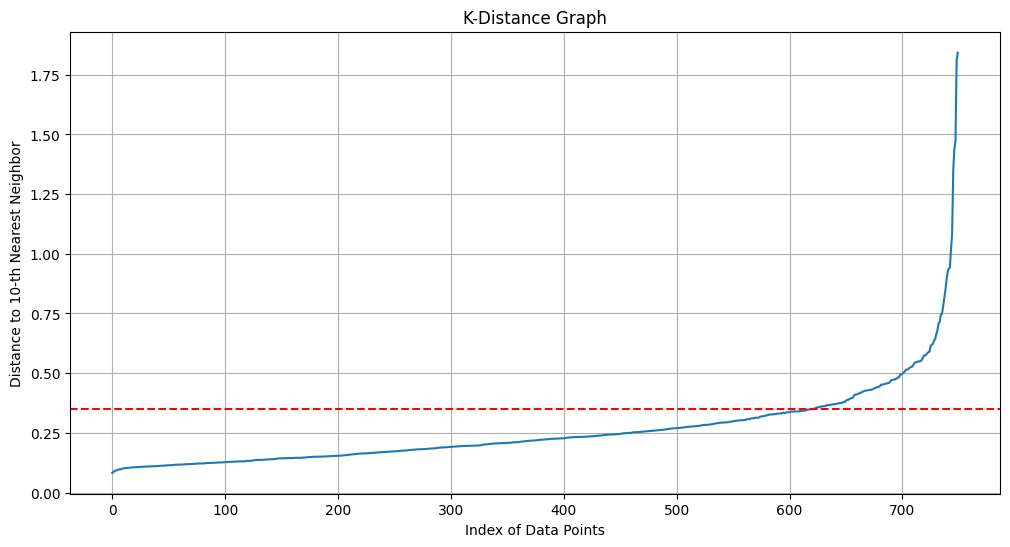

In [ ]:
from sklearn.neighbors import NearestNeighbors  # For finding nearest neighbors

# Define the number of nearest neighbors (k) to consider, which can be adjusted based on the dataset
k = 10  # Number of nearest neighbors

# Initialize the NearestNeighbors model with the specified number of neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=k)

# Fit the model to the PCA-reduced features for efficient querying
nearest_neighbors.fit(reduced_features)

# Get the distances and indices of the k-nearest neighbors for each point in the dataset
distances, indices = nearest_neighbors.kneighbors(reduced_features)

# Extract the distances to the k-th nearest neighbor for each point and sort them
# This helps in identifying the optimal epsilon value for DBSCAN clustering
sorted_distances = np.sort(distances[:, k-1], axis=0)

# Plot the k-distance graph to aid in choosing the appropriate epsilon value for clustering
plt.figure(figsize=(12, 6))
plt.plot(sorted_distances)
plt.title('K-Distance Graph')
plt.xlabel('Index of Data Points')
plt.ylabel(f'Distance to {k}-th Nearest Neighbor')
plt.axhline(y=0.35, color='r', linestyle='--')  # Add a reference line to indicate the epsilon threshold
plt.grid(True)  # Add grid lines for better clarity
plt.show()


For n_clusters = 2, the average silhouette_score is: 0.47131258960818223
For n_clusters = 3, the average silhouette_score is: 0.4705394516625218
For n_clusters = 4, the average silhouette_score is: 0.476007630064917
For n_clusters = 5, the average silhouette_score is: 0.5032058026558799
For n_clusters = 6, the average silhouette_score is: 0.5628975762953041
For n_clusters = 7, the average silhouette_score is: 0.5440001114623877
For n_clusters = 8, the average silhouette_score is: 0.5395520219399926
For n_clusters = 9, the average silhouette_score is: 0.5523624109790625
For n_clusters = 10, the average silhouette_score is: 0.5351624631010818


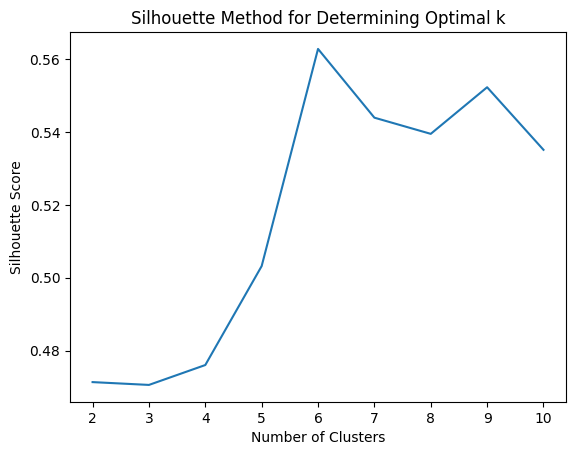

In [ ]:
# Import the silhouette_score function for evaluating clustering results
from sklearn.metrics import silhouette_score

# Assign the PCA-reduced features to 'X_clu' for clustering analysis
X_clu = reduced_features

# Define the range of cluster numbers to test, from 2 to 10
range_n_clusters = list(range(2, 11))

# Create a list to store the average silhouette scores for each number of clusters
silhouette_avg_scores = []

# Iterate through the range of cluster numbers
for n_clusters in range_n_clusters:
    # Set up the KMeans model with the specified number of clusters and a fixed random state
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)

    # Apply the KMeans algorithm and get the predicted cluster labels
    cluster_labels = clusterer.fit_predict(X_clu)

    # Calculate the average silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_clu, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

    # Print the silhouette score for each number of clusters
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

# Plot the silhouette scores to visualize how the number of clusters affects clustering quality
plt.plot(range_n_clusters, silhouette_avg_scores)
plt.xlabel('Number of Clusters')  # Label for the x-axis
plt.ylabel('Silhouette Score')  # Label for the y-axis
plt.title('Silhouette Method for Determining Optimal k')  # Title of the plot
plt.show()  # Display the plot


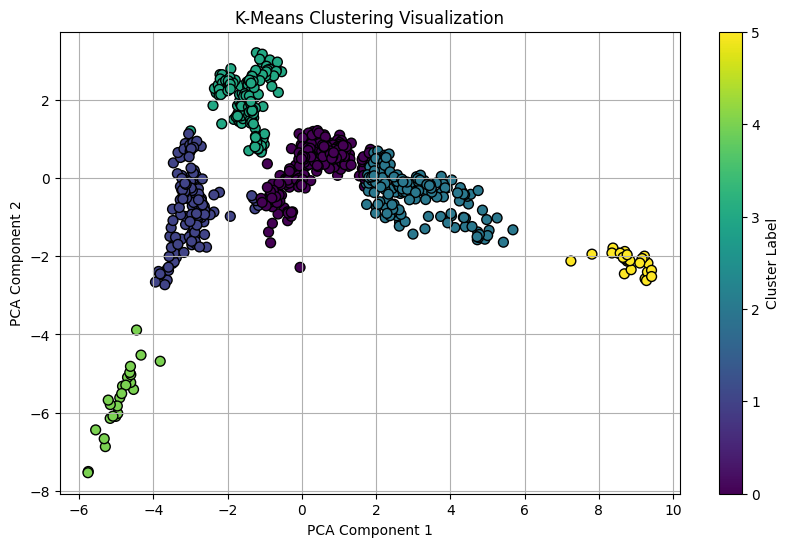

In [ ]:
# Import the necessary libraries for clustering and visualization
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans clustering to the reduced data with 6 clusters and a fixed random state for consistency
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit the model to the reduced features and predict the cluster labels
kmeans_clusters = kmeans.fit_predict(reduced_features)

# Create a scatter plot to visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=50)

# Add title and axis labels to the plot
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add a color bar to map colors to cluster labels
plt.colorbar(label='Cluster Label')

# Enable gridlines for improved readability
plt.grid(True)

# Show the plot
plt.show()


Anomalies based cluster

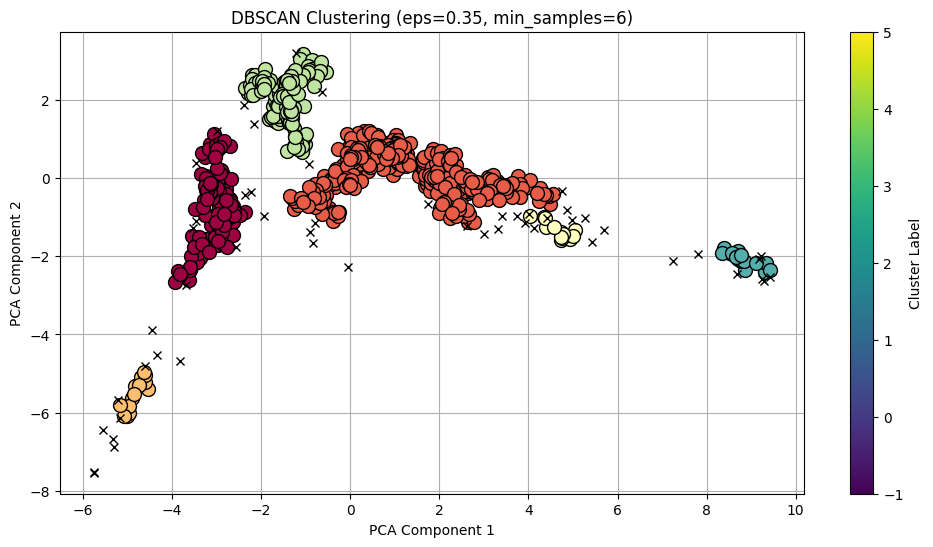

clusters: 6
Anomaly points: 22


In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Set the epsilon parameter for DBSCAN to control the maximum distance between points within the same neighborhood
eps_value = 0.35

# Initialize the DBSCAN model with the specified parameters
dbscan = DBSCAN(eps=eps_value, min_samples=6)

# Fit DBSCAN to the reduced feature set to discover clusters and identify outliers
dbscan_clusters = dbscan.fit_predict(reduced_features)

# Mask to identify core samples
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Determine the number of clusters excluding noise (labeled as -1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# Count the number of noise points (-1 in DBSCAN)
n_noise_ = list(labels).count(-1)

# Plotting the clustering results
fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))

# Plot clusters
for k, col in zip(set(labels), colors):
    if k == -1:
        # Plot noise points in black
        color = 'k'
    else:
        # Assign the color to the cluster
        color = tuple(col)

    # Mask to select the points for each cluster
    class_member_mask = (labels == k)

    # Plot core points
    xy = reduced_features[class_member_mask & core_samples_mask]
    ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=color, markeredgecolor='k', markersize=10)

    # Plot border points
    xy = reduced_features[class_member_mask & ~core_samples_mask]
    ax.plot(xy[:, 0], xy[:, 1], 'x', markerfacecolor=color, markeredgecolor='k', markersize=6)

# Enhance the plot with titles and labels
ax.set_title(f'DBSCAN Clustering (eps={eps_value}, min_samples=6)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')

# Add a colorbar to show cluster labels
norm = Normalize(vmin=min(labels), vmax=max(labels))
sm = ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# Add the colorbar to the plot axes
plt.colorbar(sm, ax=ax, label='Cluster Label')

ax.grid(True)
plt.show()

# Print the clustering results
print(f'clusters: {n_clusters_}')
print(f'Anomaly points: {n_noise_}')
